In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
iris = load_iris()
X = iris.data
Y = iris.target

print(f"Shape of feature matrix (X): {X.shape}")
print(f"Shape of target matrix (Y): {Y.shape}")

Shape of feature matrix (X): (150, 4)
Shape of target matrix (Y): (150,)


In [ ]:
K = np.unique(Y).shape[0]
print(f"Number of classes: {K}")

Number of classes: 3


<h3> <b> My implementation

In [ ]:
def sse(A, B): return euclidean(A, B) ** 2

In [ ]:
def kmeans(X, K, max_iter, tol):

    obj_traj = []

    # Initialize the centroids.
    C = X[np.random.randint(0, X.shape[0], size=K), :]

    # Run the first iteration.
    clusters = [[] for _ in range(K)]

    obj = 0

    for i in range(X.shape[0]):

        dist = [sse(X[i], C[k]) for k in range(K)]
        nearest_c = np.argmin(dist)
        obj += dist[nearest_c]
        clusters[nearest_c].append(i)

    obj_traj.append(obj)

    for iter in range(1, max_iter):

        # Update the centroids.
        for k in range(K): C[k] = np.mean(X[clusters[k], :], axis=0)

        clusters = [[] for _ in range(K)]
        obj = 0

        # Assign the data to the updated centroids.
        for i in range(X.shape[0]):

            dist = [sse(X[i], C[k]) for k in range(K)]
            nearest_c = np.argmin(dist)
            obj += dist[nearest_c]
            clusters[nearest_c].append(i)

        obj_traj.append(obj)

        if np.abs(obj_traj[iter] - obj_traj[iter-1]) <= tol: break

    return C, clusters, obj_traj

In [ ]:
centroids, clusters, obj_traj = kmeans(X, K, 300, 0.001)

In [ ]:
centroids

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

In [ ]:
obj_traj

[537.2899999999993,
 158.09979003963716,
 85.83358203784289,
 79.45325845536898,
 78.91005673645704,
 78.85144142614601,
 78.85144142614601]

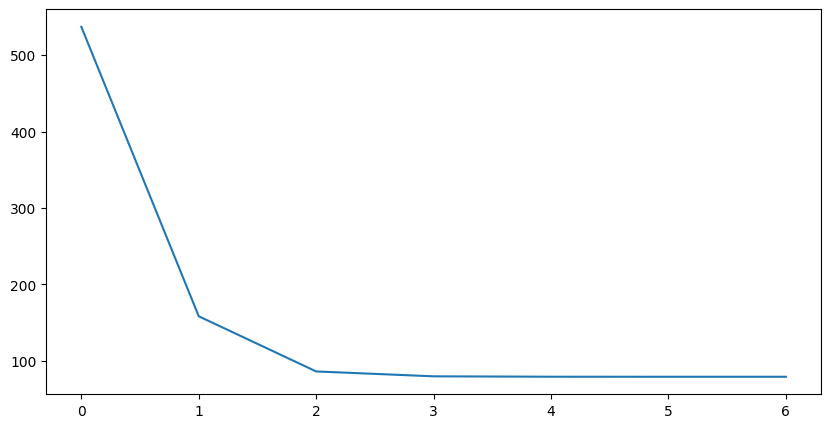

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(obj_traj)
plt.show()

<h3> <b> Scikit-learn implementation

In [ ]:
km_sk = KMeans(n_clusters=K,
               init="random",
               max_iter=300)

In [ ]:
km_sk.fit(X)

/home/tsompanidisn/DL/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=3)

In [ ]:
km_sk.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ]])

In [ ]:
km_sk.inertia_

78.85144142614601